# 量子テレポーテーションと通信リソースとしての量子エンタングルメント

- 量子エンタングルメント自体は何もしないので、量子テレポーテーションを使って量子情報を伝送するための通信リソースとして扱う
- 古典通信においてもエンジニアが光ファイバー・フォトダイオード・レーザーダイオードの仕組みとかなぜHTTP(S)通信ができるかというのは意識する必要がなく、どうやったら通信ができているかを示すことが重要
- いきなりテレポーテーションやらせるとなんだか理解できないけど、最初に見せるだけ見せてそれの解説をしていくというテイストならわかるかもしれない

- 詳細な説明は他に譲る
    - 量子ビット
    - 量子エンタングルメント
    - 量子テレポーテーション
    - ベル測定
    - ベル状態

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

## 量子テレポーテーション

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from qiskit.visualization import plot_histogram

In [3]:
def entanglement(qc, control, target):
    qc.h(control)
    qc.cx(control, target)

def z_measure(qc, qr, cr):
    qc.measure(qr, cr)

def x_measure(qc, qr, cr):
    qc.h(qr_node1[0])
    qc.measure(qr_node1[0], cr_node1_x)

def bell_measure(qc, qr_x, cr_x, qr_z, cr_z):
    qc.cx(qr_x, qr_z)
    x_measure(qc, qr_x, cr_x)
    z_measure(qc, qr_z, cr_z)
    

/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


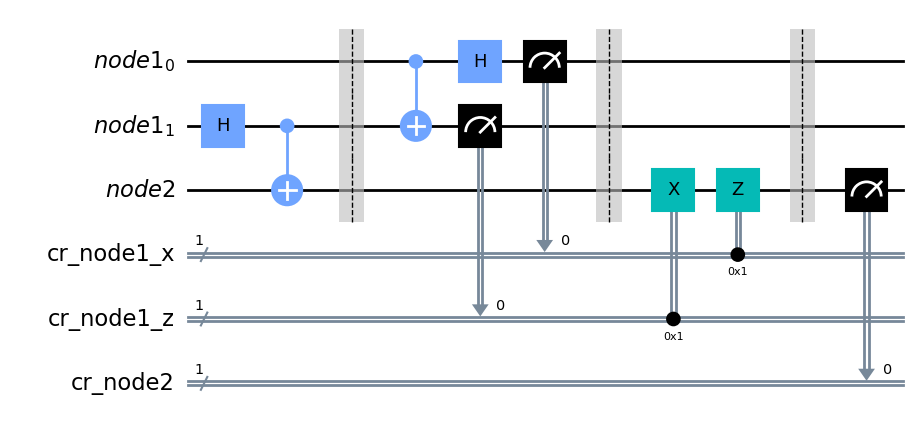

In [4]:
qr_node1 = QuantumRegister(2, name='node1')
qr_node2 = QuantumRegister(1, name='node2')
cr_node1_x = ClassicalRegister(1, name='cr_node1_x')
cr_node1_z = ClassicalRegister(1, name='cr_node1_z')
cr_node2 = ClassicalRegister(1, name='cr_node2')

qc = QuantumCircuit(qr_node1, cr_node1_x, cr_node1_z, qr_node2, cr_node2, name='teleportation')

entanglement(qc, qr_node1[1], qr_node2)
qc.barrier(qr_node1, qr_node2)

bell_measure(qc, qr_node1[0], cr_node1_x, qr_node1[1], cr_node1_z)
qc.barrier(qr_node1, qr_node2)

qc.x(qr_node2).c_if(cr_node1_z, 1)
qc.z(qr_node2).c_if(cr_node1_x, 1)
qc.barrier(qr_node1, qr_node2)

qc.measure(qr_node2, cr_node2)

qc.draw(output='mpl')

## 入力が | 0 >の場合

### 量子エンタングルメントが存在する場合

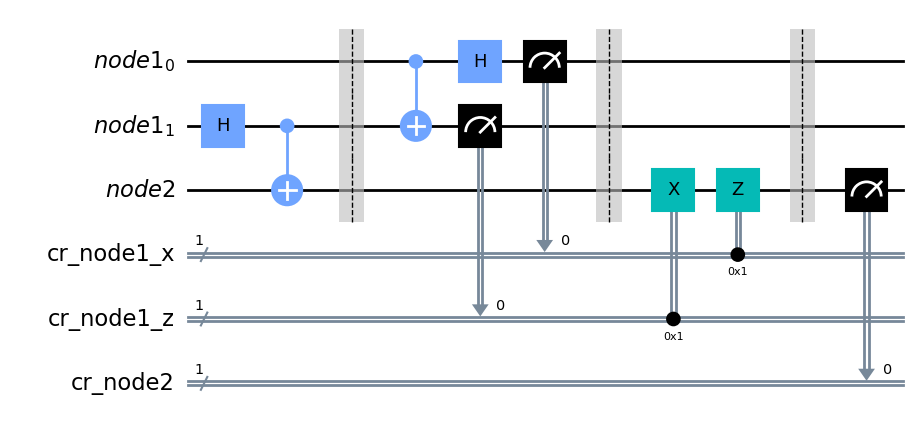

In [5]:
qr_node1 = QuantumRegister(2, name='node1')
qr_node2 = QuantumRegister(1, name='node2')
cr_node1_x = ClassicalRegister(1, name='cr_node1_x')
cr_node1_z = ClassicalRegister(1, name='cr_node1_z')
cr_node2 = ClassicalRegister(1, name='cr_node2')

qc = QuantumCircuit(qr_node1, cr_node1_x, cr_node1_z, qr_node2, cr_node2, name='teleportation')

entanglement(qc, qr_node1[1], qr_node2)
qc.barrier(qr_node1, qr_node2)

bell_measure(qc, qr_node1[0], cr_node1_x, qr_node1[1], cr_node1_z)
qc.barrier(qr_node1, qr_node2)

qc.x(qr_node2).c_if(cr_node1_z, 1)
qc.z(qr_node2).c_if(cr_node1_x, 1)
qc.barrier(qr_node1, qr_node2)

qc.measure(qr_node2, cr_node2)

qc.draw(output='mpl')

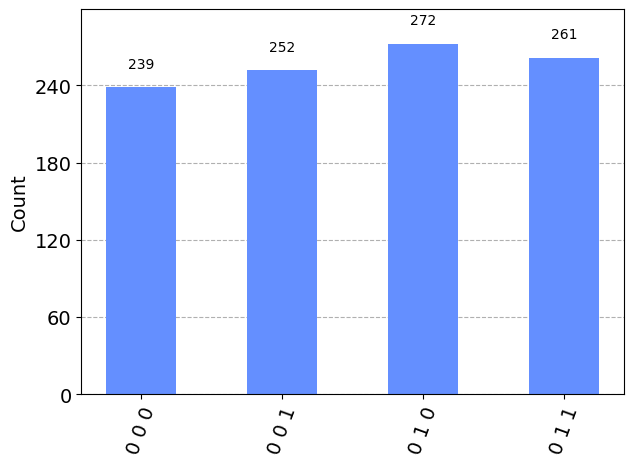

In [6]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend)
result = job.result()

count = result.get_counts()
plot_histogram(count)

### 量子エンタングルメントが存在しない場合

/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


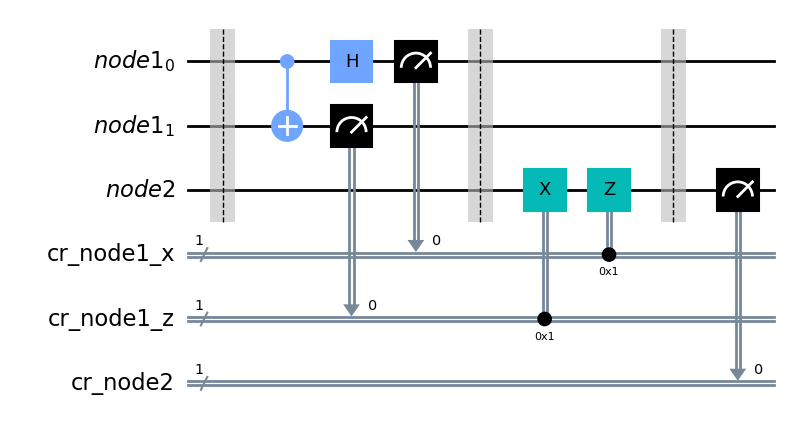

In [7]:
qr_node1 = QuantumRegister(2, name='node1')
qr_node2 = QuantumRegister(1, name='node2')
cr_node1_x = ClassicalRegister(1, name='cr_node1_x')
cr_node1_z = ClassicalRegister(1, name='cr_node1_z')
cr_node2 = ClassicalRegister(1, name='cr_node2')

qc = QuantumCircuit(qr_node1, cr_node1_x, cr_node1_z, qr_node2, cr_node2, name='teleportation')

# entanglement(qc, qr_node1[1], qr_node2)
qc.barrier(qr_node1, qr_node2)

bell_measure(qc, qr_node1[0], cr_node1_x, qr_node1[1], cr_node1_z)
qc.barrier(qr_node1, qr_node2)

qc.x(qr_node2).c_if(cr_node1_z, 1)
qc.z(qr_node2).c_if(cr_node1_x, 1)
qc.barrier(qr_node1, qr_node2)

qc.measure(qr_node2, cr_node2)

qc.draw(output='mpl')

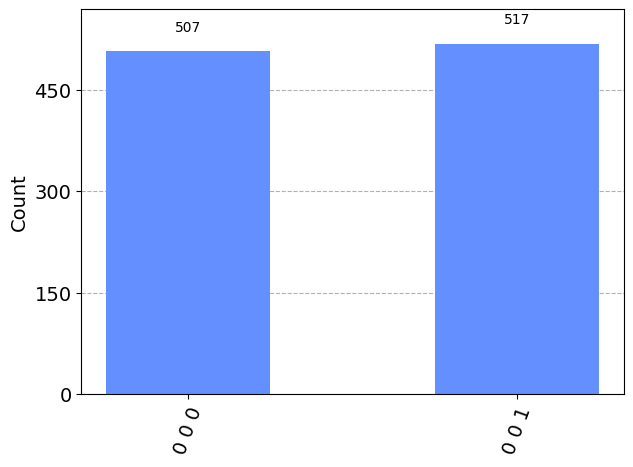

In [8]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend)
result = job.result()

count = result.get_counts()
plot_histogram(count)

## 入力が | 1 >の場合

### 量子エンタングルメントが存在する場合

/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


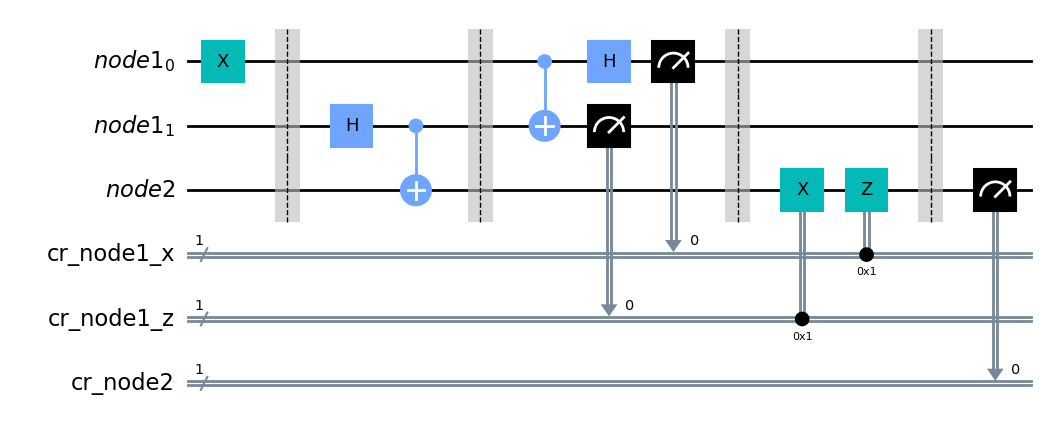

In [9]:
qr_node1 = QuantumRegister(2, name='node1')
qr_node2 = QuantumRegister(1, name='node2')
cr_node1_x = ClassicalRegister(1, name='cr_node1_x')
cr_node1_z = ClassicalRegister(1, name='cr_node1_z')
cr_node2 = ClassicalRegister(1, name='cr_node2')

qc = QuantumCircuit(qr_node1, cr_node1_x, cr_node1_z, qr_node2, cr_node2, name='teleportation')

qc.x(qr_node1[0])
qc.barrier(qr_node1, qr_node2)

entanglement(qc, qr_node1[1], qr_node2)
qc.barrier(qr_node1, qr_node2)

bell_measure(qc, qr_node1[0], cr_node1_x, qr_node1[1], cr_node1_z)
qc.barrier(qr_node1, qr_node2)

qc.x(qr_node2).c_if(cr_node1_z, 1)
qc.z(qr_node2).c_if(cr_node1_x, 1)
qc.barrier(qr_node1, qr_node2)

qc.measure(qr_node2, cr_node2)

qc.draw(output='mpl')

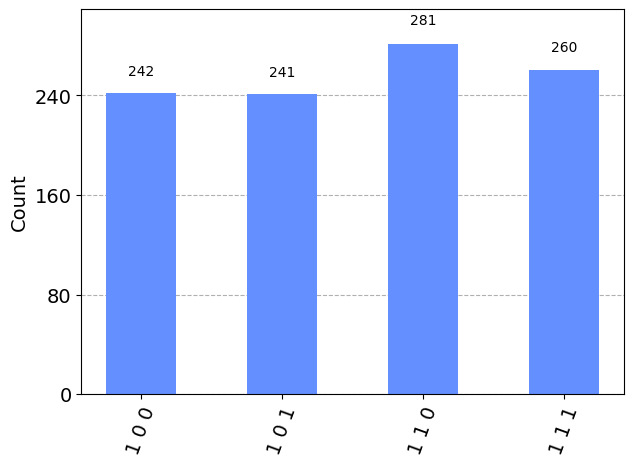

In [10]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend)
result = job.result()

count = result.get_counts()
plot_histogram(count)

### 量子エンタングルメントが存在しない場合

/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


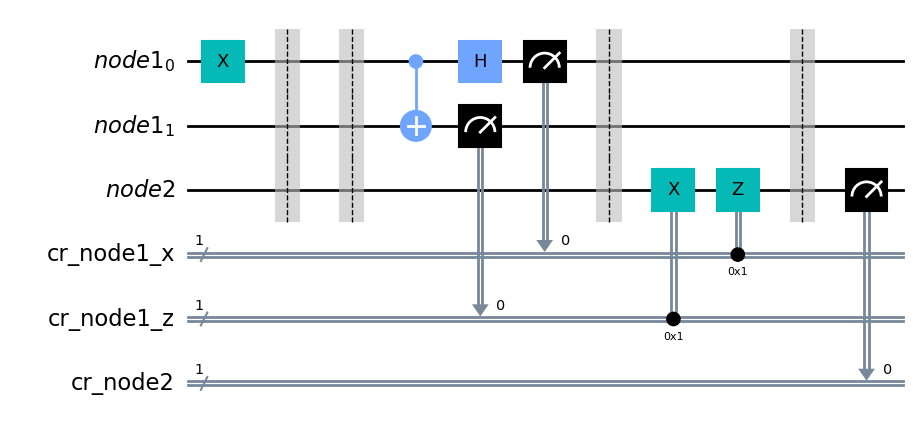

In [11]:
qr_node1 = QuantumRegister(2, name='node1')
qr_node2 = QuantumRegister(1, name='node2')
cr_node1_x = ClassicalRegister(1, name='cr_node1_x')
cr_node1_z = ClassicalRegister(1, name='cr_node1_z')
cr_node2 = ClassicalRegister(1, name='cr_node2')

qc = QuantumCircuit(qr_node1, cr_node1_x, cr_node1_z, qr_node2, cr_node2, name='teleportation')

qc.x(qr_node1[0])
qc.barrier(qr_node1, qr_node2)

# entanglement(qc, qr_node1[1], qr_node2)
qc.barrier(qr_node1, qr_node2)

bell_measure(qc, qr_node1[0], cr_node1_x, qr_node1[1], cr_node1_z)
qc.barrier(qr_node1, qr_node2)

qc.x(qr_node2).c_if(cr_node1_z, 1)
qc.z(qr_node2).c_if(cr_node1_x, 1)
qc.barrier(qr_node1, qr_node2)

qc.measure(qr_node2, cr_node2)

qc.draw(output='mpl')

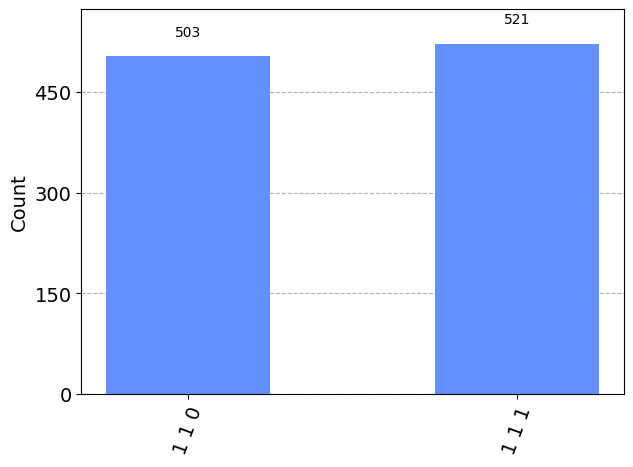

In [12]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend)
result = job.result()

count = result.get_counts()
plot_histogram(count)

## 入力が | + >の場合

### 量子エンタングルメントが存在する場合

/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


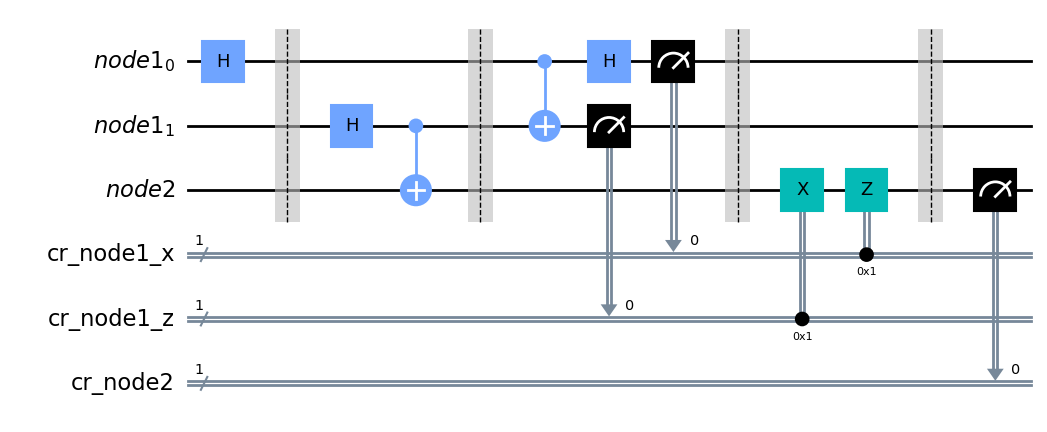

In [13]:
qr_node1 = QuantumRegister(2, name='node1')
qr_node2 = QuantumRegister(1, name='node2')
cr_node1_x = ClassicalRegister(1, name='cr_node1_x')
cr_node1_z = ClassicalRegister(1, name='cr_node1_z')
cr_node2 = ClassicalRegister(1, name='cr_node2')

qc = QuantumCircuit(qr_node1, cr_node1_x, cr_node1_z, qr_node2, cr_node2, name='teleportation')

qc.h(qr_node1[0])
qc.barrier(qr_node1, qr_node2)

entanglement(qc, qr_node1[1], qr_node2)
qc.barrier(qr_node1, qr_node2)

bell_measure(qc, qr_node1[0], cr_node1_x, qr_node1[1], cr_node1_z)
qc.barrier(qr_node1, qr_node2)

qc.x(qr_node2).c_if(cr_node1_z, 1)
qc.z(qr_node2).c_if(cr_node1_x, 1)
qc.barrier(qr_node1, qr_node2)

qc.measure(qr_node2, cr_node2)

qc.draw(output='mpl')

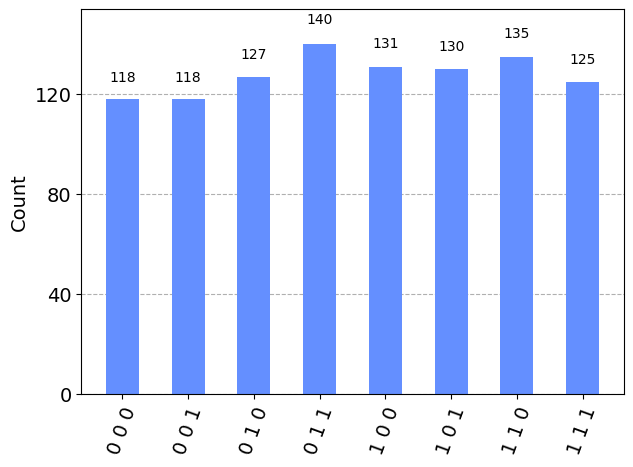

In [14]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend)
result = job.result()

count = result.get_counts()
plot_histogram(count)

1番下の値がnode2

因数分解していくと受信側で|+>の純粋状態を取り出せる

Z測定しているのでnode2も確率が50%になっている

### X測定してみる

/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


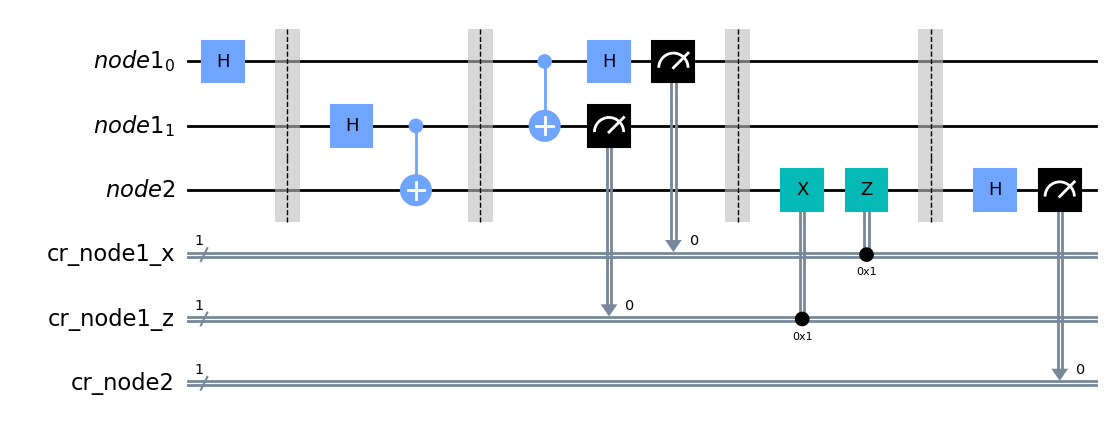

In [15]:
qr_node1 = QuantumRegister(2, name='node1')
qr_node2 = QuantumRegister(1, name='node2')
cr_node1_x = ClassicalRegister(1, name='cr_node1_x')
cr_node1_z = ClassicalRegister(1, name='cr_node1_z')
cr_node2 = ClassicalRegister(1, name='cr_node2')

qc = QuantumCircuit(qr_node1, cr_node1_x, cr_node1_z, qr_node2, cr_node2, name='teleportation')

qc.h(qr_node1[0])
qc.barrier(qr_node1, qr_node2)

entanglement(qc, qr_node1[1], qr_node2)
qc.barrier(qr_node1, qr_node2)

bell_measure(qc, qr_node1[0], cr_node1_x, qr_node1[1], cr_node1_z)
qc.barrier(qr_node1, qr_node2)

qc.x(qr_node2).c_if(cr_node1_z, 1)
qc.z(qr_node2).c_if(cr_node1_x, 1)
qc.barrier(qr_node1, qr_node2)

qc.h(qr_node2)
qc.measure(qr_node2, cr_node2)

qc.draw(output='mpl')

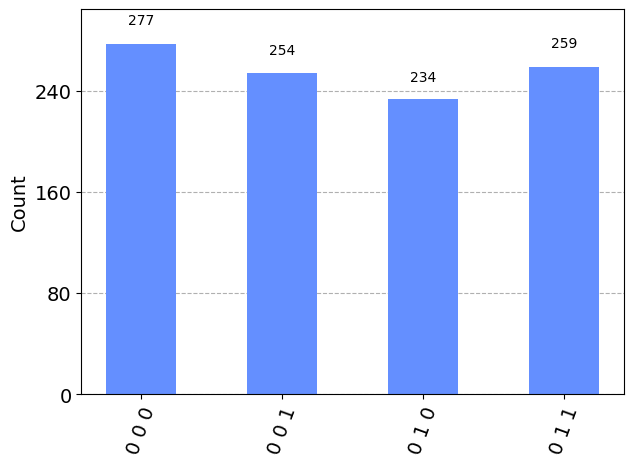

In [16]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend)
result = job.result()

count = result.get_counts()
plot_histogram(count)

(P0 + P1) x (P0 + P1) x P+ ということで、独立して取り出せた

### 量子エンタングルメントが存在しない場合

/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


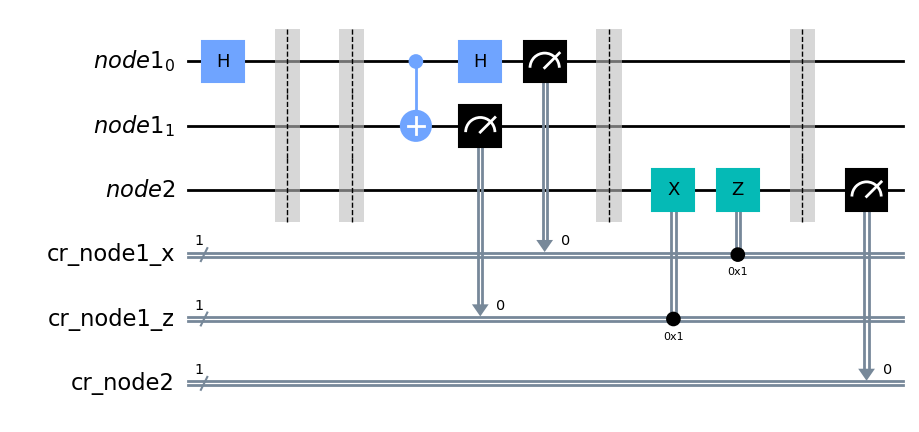

In [17]:
qr_node1 = QuantumRegister(2, name='node1')
qr_node2 = QuantumRegister(1, name='node2')
cr_node1_x = ClassicalRegister(1, name='cr_node1_x')
cr_node1_z = ClassicalRegister(1, name='cr_node1_z')
cr_node2 = ClassicalRegister(1, name='cr_node2')

qc = QuantumCircuit(qr_node1, cr_node1_x, cr_node1_z, qr_node2, cr_node2, name='teleportation')

qc.h(qr_node1[0])
qc.barrier(qr_node1, qr_node2)

# entanglement(qc, qr_node1[1], qr_node2)
qc.barrier(qr_node1, qr_node2)

bell_measure(qc, qr_node1[0], cr_node1_x, qr_node1[1], cr_node1_z)
qc.barrier(qr_node1, qr_node2)

qc.x(qr_node2).c_if(cr_node1_z, 1)
qc.z(qr_node2).c_if(cr_node1_x, 1)
qc.barrier(qr_node1, qr_node2)

qc.measure(qr_node2, cr_node2)

qc.draw(output='mpl')

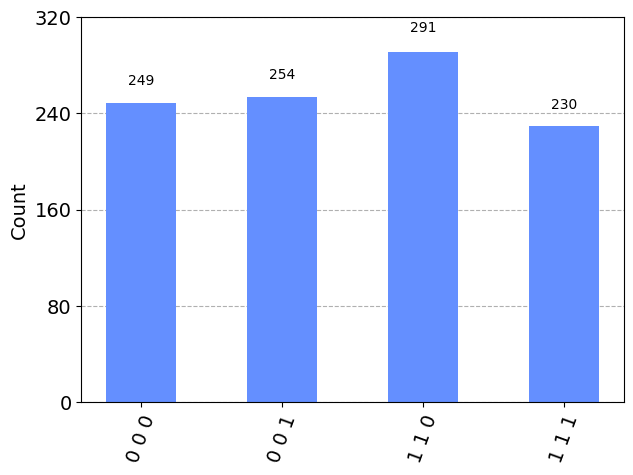

In [18]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend)
result = job.result()

count = result.get_counts()
plot_histogram(count)

受信側で純粋状態を取り出せない

(P0 + P1) x (P0P0 + P1P1)ということで、node2のビットを独立して取り出せない